<a href="https://colab.research.google.com/github/Nikithanraj21-25/Project-AI/blob/main/ModelValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Energy Meter using ML**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [16]:
!pip install pandas


In [17]:
from pandas import read_csv #handling csv files

In [18]:
from google.colab import files
uploaded = files.upload()

Saving Energy Meter.csv to Energy Meter (1).csv


In [19]:
fileName = "Energy Meter.csv"
names = ['Voltage', 'Current', 'Power', 'Class']
dataset = read_csv(fileName, names = names)
print(dataset)

      Voltage   Current       Power   Class
0      0.0000  0.000000    0.000000  NoLoad
1      0.0000  0.000000    0.000000  NoLoad
2      0.0000  0.000000    0.000000  NoLoad
3      0.0000  0.000000    0.000000  NoLoad
4      0.0000  0.000000    0.000000  NoLoad
..        ...       ...         ...     ...
395  214.2647  0.847530  181.595761    Risk
396  214.6480  0.850669  182.594400    Risk
397  215.0313  0.850669  182.920461    Risk
398  211.9649  0.850669  180.311970    Risk
399  215.7979  0.850669  183.572584    Risk

[400 rows x 4 columns]


## **Summarize Dataset**

In [20]:
print(dataset.shape) #show no. of rows and columns
print(dataset.head(5)) #shows first five data
print(dataset.describe()) #Details of dataset
print(dataset.groupby('Class').size()) #Count dataset based on classes

(400, 4)
   Voltage  Current  Power   Class
0      0.0      0.0    0.0  NoLoad
1      0.0      0.0    0.0  NoLoad
2      0.0      0.0    0.0  NoLoad
3      0.0      0.0    0.0  NoLoad
4      0.0      0.0    0.0  NoLoad
          Voltage     Current       Power
count  400.000000  400.000000  400.000000
mean   160.657320    0.317734   68.065053
std     93.125536    0.320430   68.941682
min      0.000000    0.000000    0.000000
25%     79.151450    0.076849    0.000000
50%    213.114800    0.176985   38.430426
75%    215.031300    0.398765  101.438042
max    304.340200    1.227349  264.859337
Class
Medium    100
NoLoad    100
Normal    100
Risk      100
dtype: int64


## **Visualize data**

In [21]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

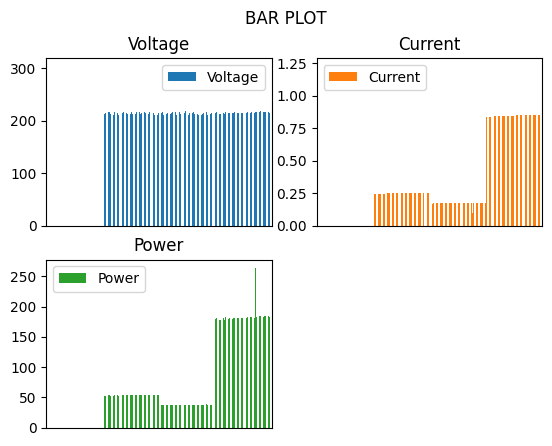

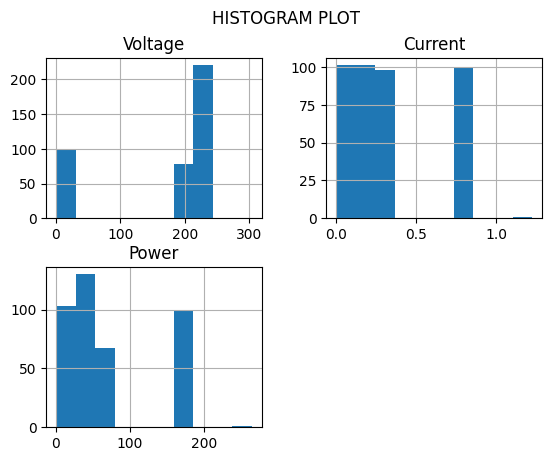

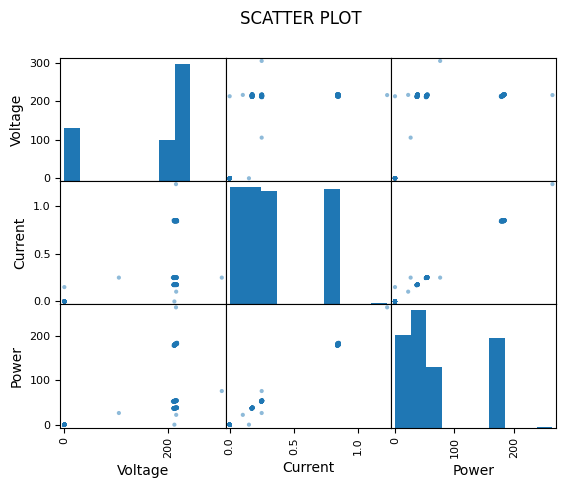

In [15]:
#BAR PLOT
ax = dataset.plot(kind='bar', subplots=True, layout=(2, 2), use_index=False)
for row in ax:
    for subplot in row:
        subplot.grid(False)  # Remove gridlines
        subplot.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Remove x-axis ticks and labels
pyplot.suptitle('BAR PLOT')
pyplot.show()

#HISTOGRAM
dataset.hist()
pyplot.suptitle('HISTOGRAM PLOT')
pyplot.show()

#SCATTER PLOT
scatter_matrix(dataset)
pyplot.suptitle('SCATTER PLOT')
pyplot.show()




## **Evaluating various ML Algorithm**

### **loading library for algorithm, splitting dataset, evaluation method**

In [22]:
!pip install scikit-learn #for load the algorithm

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split #for splitting dataset into train and test

#for evaluate algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


### **Segregation of data as input and output**

In [24]:
array = dataset.values #store dataset in array
x = array[:,0:3] #input
y = array[:,3] #output
print(x)
print(y)

[[0.0 0.0 0.0]
 [0.0 0.0 0.0]
 [0.0 0.0 0.0]
 ...
 [215.0313 0.850669 182.9204609]
 [211.9649 0.850669 180.3119695]
 [215.7979 0.850669 183.5725838]]
['NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad'
 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad'
 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad'
 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad'
 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad'
 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad'
 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad'
 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad'
 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad'
 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad'
 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad'
 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' 'NoLoad' '

### **Splitting dataset for Training and Validation**

In [25]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.20, random_state=1, shuffle=True)

### **Loading ML Algorithm**

In [26]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))


LR: 0.996875 (0.009375)
LDA: 0.996875 (0.009375)
KNN: 0.993750 (0.018750)
CART: 0.996875 (0.009375)
NB: 0.990625 (0.020010)
SVM: 0.990625 (0.020010)


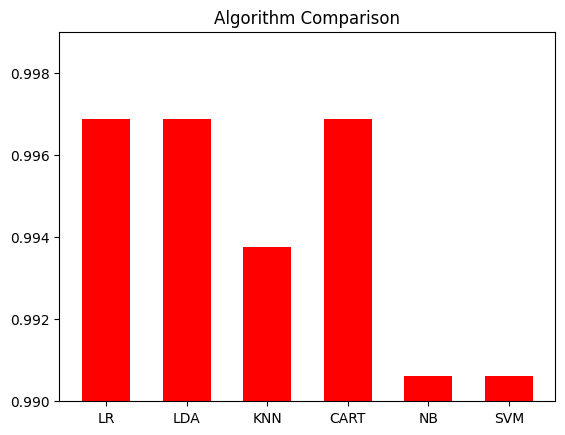

In [27]:
results = []
names = []
res = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=None)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  res.append(cv_results.mean())
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

pyplot.ylim(.990, .999)
pyplot.bar(names, res, color='red', width=0.6)

pyplot.title('Algorithm Comparison')
pyplot.show()
